# On Analyzing Real World Time Series for Forecasting
Throughtout this notebook, we will do some preliminary investigations on time series datasets that come from real world problems. We'll begin by conducting exploratory data analysis and then begin developing our models.

## What Needs to be Done
- [ ] Map out system structure for performing our computations of interest
- [ ] Flush out a few models of interest so we can make forecast on real world data
- [ ] Develop the abstraction for our `Model` class that most models typically have when forecasting
- [ ] Figure out whether the data we're analyzing is stationary or not.
- [ ] Write support for `ARIMA` class of models.
- [ ] Revisit chapter 2 and add support for other quantities of interest to compute.

### Attributes:
1. data: A list or array-like structure storing the time series data points.
2. timestamps: A list or array-like structure that stores the timestamps for each data point. It could be dates, times, or simply indices.
3. frequency: A string or some identifier representing the frequency of data collection (e.g., 'daily', 'monthly').

### Methods:
5. decompose(): To decompose the time series into trend, seasonality, and residuals.
7. train_test_split(split_ratio): To split the data into a training and test set.
8. smoothing(method): Apply various smoothing techniques (e.g., moving average).

### Files:
8. time_series: A python module that contain classes and methods/functions.
9. data_loader: A python module that loads data. In this module, we have functions for loading passenger airline and Yahoo Finance stock data.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from collections import namedtuple
from time_series import TimeSeriesFactory, UnivariateTimeSeries
from data_loader import build_airline_passenger_uts, build_stock_uts, build_any_time_series_uts
from ts_models import Model as baseModel

## Airline Passenger Data Analysis

In [2]:
airline_passengers = build_airline_passenger_uts()
airline_passengers

UnivariateTimeSeries(passengers_count)

- `object` `.methods()`

In [3]:
print(airline_passengers.get_time_col_name)
print(airline_passengers.get_value_col_name)
ap_df = airline_passengers.get_as_df
ap_df

month
passengers_count


,passengers_count
month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


In [4]:
ap_df.iloc[0:, :0]
# ap_df.iloc[:1, :0]
# ap_df.iloc[-1:, :0]

""
month
1949-01
1949-02
1949-03
1949-04
1949-05
...
1960-08
1960-09
1960-10


In [5]:
data = ap_df.iloc[0:, 0].values

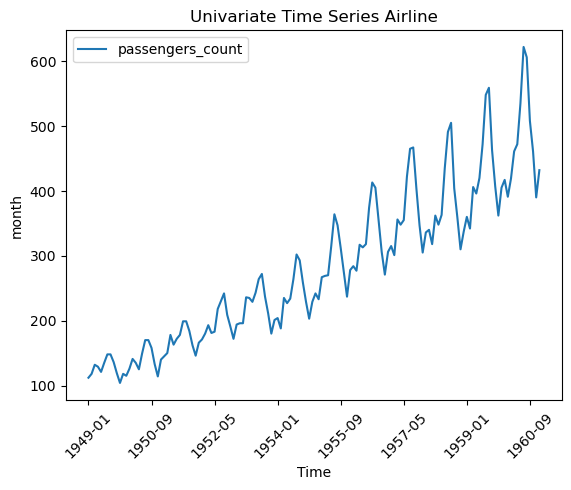

In [6]:
baseModel.plot1D(col_name="month", dataset_name="Airline", data_df=ap_df)

In [ ]:
ap_series = airline_passengers.get_series(False)
print(ap_series)

In [ ]:
airline_passengers.stationarity_test(ap_df)

In [ ]:
airline_passengers.stationarity_test(ap_df)

In [ ]:
train, validation, test = airline_passengers.get_train_validation_test_split(60, 40)
print(train), print(validation), print(test)

In [ ]:
print(airline_passengers.get_slice(1, 50))

In [ ]:
print(airline_passengers.autocovariance(3))
print(airline_passengers.autocorrelation(3))
print(airline_passengers.autocorrelation_matrix(3))

In [ ]:
ap_acov_matrix = airline_passengers.autocovariance_matrix(1)
ap_acov_matrix

In [ ]:
ap_series = airline_passengers.get_series(True)
ap_series

In [ ]:
cov_matrix = np.cov(ap_series, bias=True)
cov_matrix

In [ ]:
A = [45, 37, 42, 35, 39]
B = [38, 31, 26, 28, 33]
C = [10, 15, 17, 21, 12]

data = np.array([A, B, C])
data

In [ ]:
np.std(ap_acov_matrix)

In [ ]:
np.allclose(np.mean(ap_acov_matrix), np.std(ap_acov_matrix))

In [ ]:
new_uts = airline_passengers.normalize()
new_uts

In [ ]:
new_uts.data

In [ ]:
print(airline_passengers.get_order_k_diff(2))

In [ ]:
print(airline_passengers.mean())
print(airline_passengers.std())
print(airline_passengers.variance())
print(airline_passengers.max_min_range())
print(airline_passengers.get_statistics())

In [ ]:
airline_passengers.plot(90)

In [ ]:
airline_passengers.plot_autocorrelation(2, plot_full=True)

In [ ]:
airline_passengers.scatter_plot(1)

In [ ]:
print(airline_passengers.get_historical_data(series))

In [ ]:
print(airline_passengers.get_true_label_data(series))

In [ ]:
stationary_series

## Stock Data Analysis

In [7]:
# Only grab stocks whose data is available for the entire time period
start_date, end_date = "2013-01-01", "2023-08-08"
Stock = namedtuple("Stock", ["symbol", "name"])
stocks = [
    ("^GSPC", "S&P 500"),
    ("AAPL", "Apple"),
    ("INTC", "Intel"),
    ("AMZN", "Amazon"),
    ("TSLA", "Tesla"),
    ("GOOGL", "Google")
]
stocks = [Stock(*s) for s in stocks]
stocks = {s.symbol: build_stock_uts(s.symbol, s.name, start_date=start_date, end_date=end_date) for s in stocks}

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
values_cols = list(stocks.keys())
stock_mvts = TimeSeriesFactory.create_time_series(
    time_col="date",
    time_values=stocks[values_cols[0]].data.index,
    values_cols=values_cols,
    values=[stock.get_series() for stock in stocks.values()]
)

In [9]:
type(stocks['AAPL'])

time_series.UnivariateTimeSeries

In [10]:
apple_stock_prices_df = stocks['AAPL'].get_as_df
apple_stock_prices_df

,Open
Date,
2013-01-02,19.779285
2013-01-03,19.567142
2013-01-04,19.177500
2013-01-07,18.642857
2013-01-08,18.900356
...,...
2023-08-01,196.240005
2023-08-02,195.039993
2023-08-03,191.570007


In [11]:
aapl_series = stocks['AAPL'].get_series()
aapl_series

array([ 19.77928543,  19.56714249,  19.17749977, ..., 191.57000732,
       185.52000427, 182.13000488])

In [12]:
stocks['AAPL'].stationarity_test(aapl_series)

Series is non-stationary as 0.9862528388956524 > 0.05


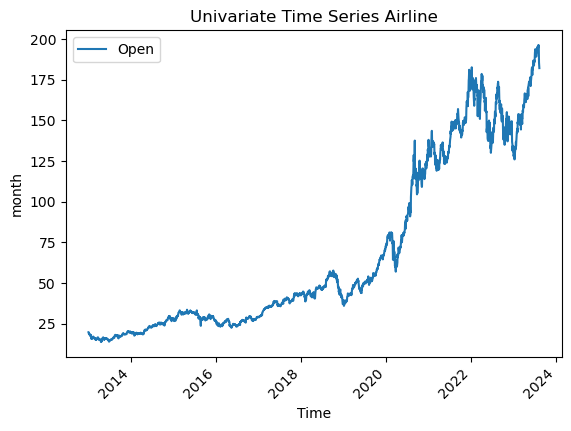

In [14]:
baseModel.plot1D(col_name="month", dataset_name="Airline", data_df=apple_stock_prices_df)

# Misc Data

In [2]:
file = "../datasets/generated_stationary_time_series.npy"
time_col_name = "Time"
value_col_name = "Observations"

In [4]:
generated_stationy_time_series = build_any_time_series_uts(file, time_col_name, value_col_name)

    Observations
0   0.000000e+00
1   5.877853e-01
2   9.510565e-01
3   9.510565e-01
4   5.877853e-01
..           ...
95  5.879543e-15
96 -5.877853e-01
97 -9.510565e-01
98 -9.510565e-01
99 -5.877853e-01

[100 rows x 1 columns]


In [5]:
generated_stationy_time_series

UnivariateTimeSeries(Observations)

In [8]:
gsts_series = generated_stationy_time_series.get_series(False)
gsts_series

array([ 0.00000000e+00,  5.87785252e-01,  9.51056516e-01,  9.51056516e-01,
        5.87785252e-01,  1.22464680e-16, -5.87785252e-01, -9.51056516e-01,
       -9.51056516e-01, -5.87785252e-01, -2.44929360e-16,  5.87785252e-01,
        9.51056516e-01,  9.51056516e-01,  5.87785252e-01,  3.67394040e-16,
       -5.87785252e-01, -9.51056516e-01, -9.51056516e-01, -5.87785252e-01,
       -4.89858720e-16,  5.87785252e-01,  9.51056516e-01,  9.51056516e-01,
        5.87785252e-01,  6.12323400e-16, -5.87785252e-01, -9.51056516e-01,
       -9.51056516e-01, -5.87785252e-01, -7.34788079e-16,  5.87785252e-01,
        9.51056516e-01,  9.51056516e-01,  5.87785252e-01,  8.57252759e-16,
       -5.87785252e-01, -9.51056516e-01, -9.51056516e-01, -5.87785252e-01,
       -9.79717439e-16,  5.87785252e-01,  9.51056516e-01,  9.51056516e-01,
        5.87785252e-01,  1.10218212e-15, -5.87785252e-01, -9.51056516e-01,
       -9.51056516e-01, -5.87785252e-01, -1.22464680e-15,  5.87785252e-01,
        9.51056516e-01,  

In [9]:
generated_stationy_time_series.stationarity_test(gsts_series)

Series is stationary as 0.0 < 0.05
